In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/11stock_prediction/data/005930.KS.csv' # 데이터 경로를 저장
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True) # 데이터를 불러오고 df에 Data 칼럼을 저장
'''
filepath_or_buffer : str, 경로 객체 또는 파일류 객체 모든 유효한 문자열 경로가 허용(문자열도 URL이 될 수 있음)

index_col : int, str, int/str 시퀀스 또는 False(기본값 = 없음) 
            DataFrame의 행 레이블로 사용할 열(문자열 이름 또는 열 인덱스로 제공됨)

parse_dates : bool 또는 int 또는 이름의 목록 또는 목록 또는 dict의 목록(기본값 False)
              True로 설정하면 인덱스를 구문 분석하려고 시도하고, 그렇지 않으면 전달된 열을 구문 분석
              
참고 : https://www.machinelearningplus.com/pandas/pandas-read_csv-completed/
'''
ts = df['Close'] # ts에 close를 저장

print(df.head(), end = '\n\n\n')
print(ts.head())

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2021-02-17  83900.0  84200.0  83000.0  83200.0  81707.648438  18307735
2021-02-18  83200.0  83600.0  82100.0  82100.0  80627.382813  21327683
2021-02-19  82300.0  82800.0  81000.0  82600.0  81118.414063  25880879
2021-02-22  83800.0  84200.0  82200.0  82200.0  80725.585938  25419886
2021-02-23  81200.0  82900.0  81100.0  82000.0  80529.171875  20587314


Date
2021-02-17    83200.0
2021-02-18    82100.0
2021-02-19    82600.0
2021-02-22    82200.0
2021-02-23    82000.0
Name: Close, dtype: float64


In [2]:
ts[ts.isna()] # 결측치가 없음,,,

Series([], Name: Close, dtype: float64)

In [3]:
'''
# 결측치 처리(결측치가 없기때문에 사용하지 않아도 됌)
ts = ts.interpolate(method='time')
# 보간(Interpolation)을 통해 앞,뒤 값을 통하여 유추하여 좀 더 스마트하게 결측치(NaN)를 채워줄 수 있습니다.
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
'''

"\n# 결측치 처리(결측치가 없기때문에 사용하지 않아도 됌)\nts = ts.interpolate(method='time')\n# 보간(Interpolation)을 통해 앞,뒤 값을 통하여 유추하여 좀 더 스마트하게 결측치(NaN)를 채워줄 수 있습니다.\nts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.\n"

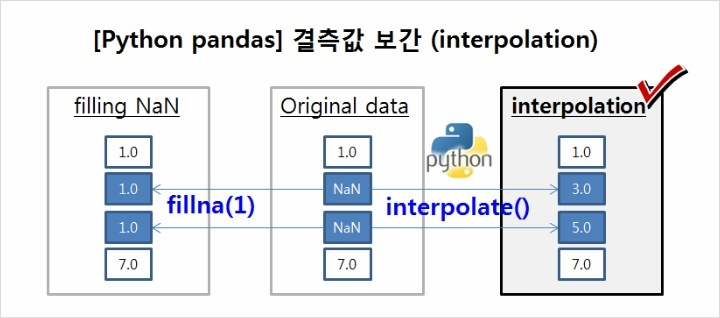

In [4]:
'''
- 로그 변환 시도 - 
numpy.log 함수는 (요소 단위로) 입력 어레이의 자연 로그 (natural logarithm) 값을 반환
    - 밑이 10 또는 2인 로그는 log10, log2를 사용합니다.
'''
ts_log = np.log(ts)

In [5]:
# timeseries 값을 받고 window는 12로 고정된 값을 받는 구간 통계치(Rolling Statistics) 함수 정의
def plot_rolling_statistics(timeseries, window=12): 
    '''
    Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
     - window : int, offset, or BaseIndexer subclass(int일 경우 각 창에 사용되는 고정된 관측 수)
             - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html#pandas.Series.rolling
    '''
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
     # 원본 시계열 시각화 
         #  - timeseries로 받는 시계열 데이터를 original라벨로 이름을 지정하고 파란색으로 표시
    orig = plt.plot(timeseries, color='blue',label='Original') 
     # 이동평균 시계열 시각화
        # - 위에서 지정한 이동평균 시계열을 입력받아 Rolling Mean라벨로 이름을 지정하고 빨간색으로 표시
    mean = plt.plot(rolmean, color='red', label='Rolling Mean') 
     # 이동표준편차 시각화
        # - # - 위에서 지정한 이동표준편차 시계열을 입력받아 Rolling Std라벨로 이름을 지정하고 검은색으로 표시
    std = plt.plot(rolstd, color='black', label='Rolling Std') 
    plt.legend(loc='best') # 라벨의 위치를 가장 좋은 곳에 표시
    plt.title('Rolling Mean & Standard Deviation')# 그래프의 이름
    # 둘의 차이점을 찾지 못했다,,,
    #plt.show(block=False)
    plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    # adfuller ( x , maxlag = None , 회귀 = 'c' , autolag = 'AIC' , store = False , regresults = False )
    # autolag : 0, 1, …, maxlag 값 중 lag 길이를 자동으로 결정할 때 사용하는 방법.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    # dftest[0:4]의 인덱스 값들을 dfoutput 변수에 저장한다
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): # dftest[4]의 키와 벨류값을 받아온다
        dfoutput['Critical Value (%s)' % key] = value # critical value (key) = value
    print(dfoutput)

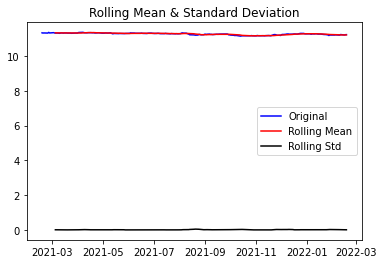

Results of Dickey-Fuller Test:
Test Statistic                  -1.889188
p-value                          0.337164
#Lags Used                       0.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


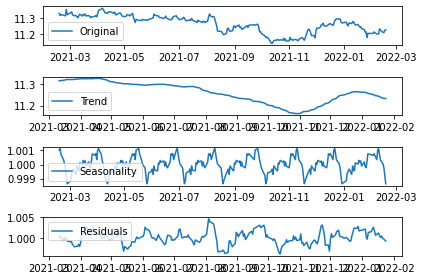

In [7]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12) # 함수 호출

# 정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log) # 함수 호출

# 시계열 분해 (Time Series Decomposition)
# seasonal_decompose 메서드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습
from statsmodels.tsa.seasonal import seasonal_decompose

# season_decompose ( x , model = 'additive' , filt = None , period = None , two_sided = True , extrapolate_trend = 0 )
# model : 계절 성분의 유형입니다. 약어가 허용
# period : 시리즈의 기간입니다.
        # x가 pandas 객체가 아니거나 x의 인덱스에 빈도가 없는 경우 사용해야 합니다. 
        # x가 시계열 인덱스가 있는 pandas 객체인 경우 x의 기본 주기를 재정의합니다.
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성
# subplot으로 4개의 plot 위치를 정한다.
# 각각 입력값을 넣고 라벨의 이름을 설정한다.
# 라벨의 위치는 best로 설정
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [8]:
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# inplace : 기본값 False
#True이면 제자리에서 작업을 수행하고 None을 반환합니다.
#NA 항목이 있는 DataFrame에서 삭제되거나 None인 경우 inplace=True.
residual.dropna(inplace=True)
# Augmented Dickey Fuller(ADF) 검정은 정상성을 알아보기 위한 단위근 검정 방법이다. 
augmented_dickey_fuller_test(residual) # augmented_dickey_fuller_test 함수에 residual 데이터를 넣어서 출력한다. 

Results of Dickey-Fuller Test:
Test Statistic                  -5.472708
p-value                          0.000002
#Lags Used                       1.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


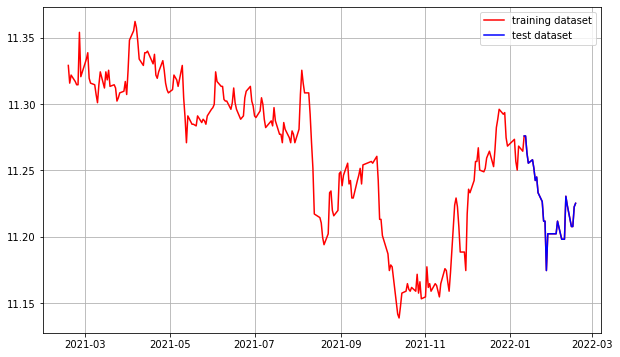

In [9]:
# 학습 데이터셋과 테스트 데이터셋을 분리
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
# 데이터 시각화
plt.figure(figsize=(10,6)) # figure 사이즈 설정
plt.grid(True) # 격자모양 삽입
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset') # test dataset 부분은 파란색으로 표시
plt.legend() # 라벨을 default값으로 출력 

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


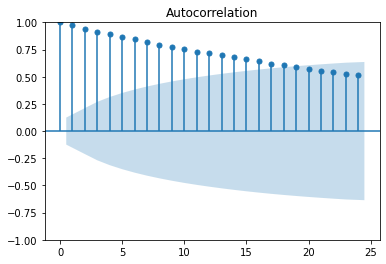

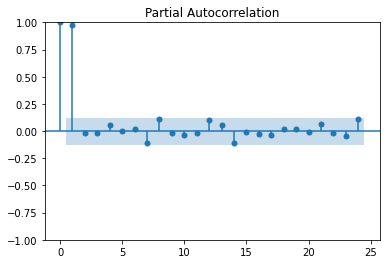

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.535769e+01
p-value                        3.647987e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


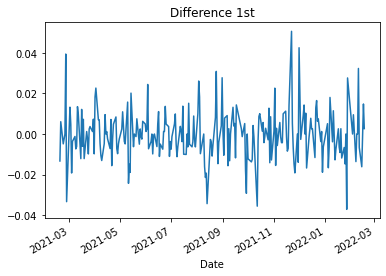

In [11]:
# 1차 차분 구하기
# DataFrame.diff(periods=1, axis=0)
# periods : 차이 계산을 위해 이동할 기간은 음수 값을 허용
diff_1 = ts_log.diff(periods=1).iloc[1:]
# 그래프 출력
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.293282e+00
p-value                        4.205271e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


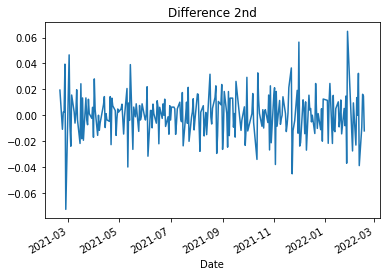

In [12]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [24]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 0, 10)) # 모델 불러오기 
fitted_m = model.fit() # 모델 학습

print(fitted_m.summary()) # 모델 시각화

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  223
Model:                ARIMA(1, 0, 10)   Log Likelihood                 671.269
Date:                Thu, 17 Feb 2022   AIC                          -1316.537
Time:                        01:46:37   BIC                          -1272.244
Sample:                             0   HQIC                         -1298.656
                                - 223                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2746      0.029    386.794      0.000      11.217      11.332
ar.L1          0.9751      0.018     54.222      0.000       0.940       1.010
ma.L1          0.0812      0.066      1.228      0.2

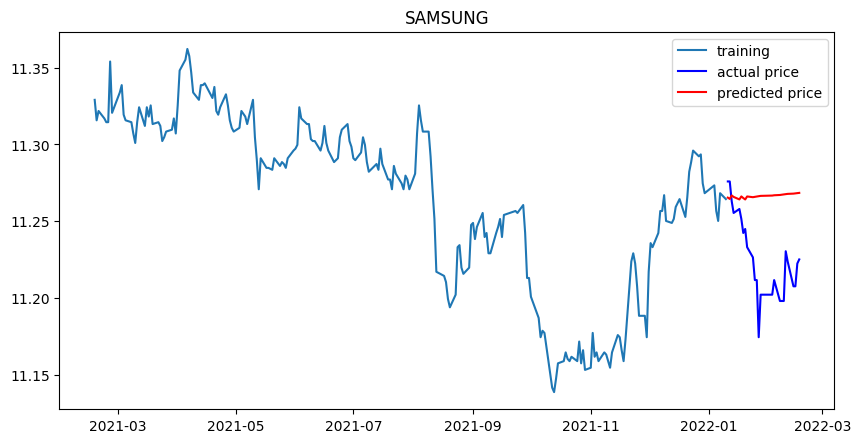

In [25]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)# fc를 넘파이 배열로 바꾼다
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과를 series로 만든다

# Plot
plt.figure(figsize=(10,5), dpi=100) # dpi는 인치당 도트 수를 나타냄(기본값 : 100)
plt.plot(train_data, label='training') # 트레이닝셋 그래프 시각화
plt.plot(test_data, c='b', label='actual price')# 테스트셋 그래프 시각화
plt.plot(fc_series, c='r',label='predicted price') # 우리가 만든 결과값 시각화
plt.title('SAMSUNG')
plt.legend()
plt.show()

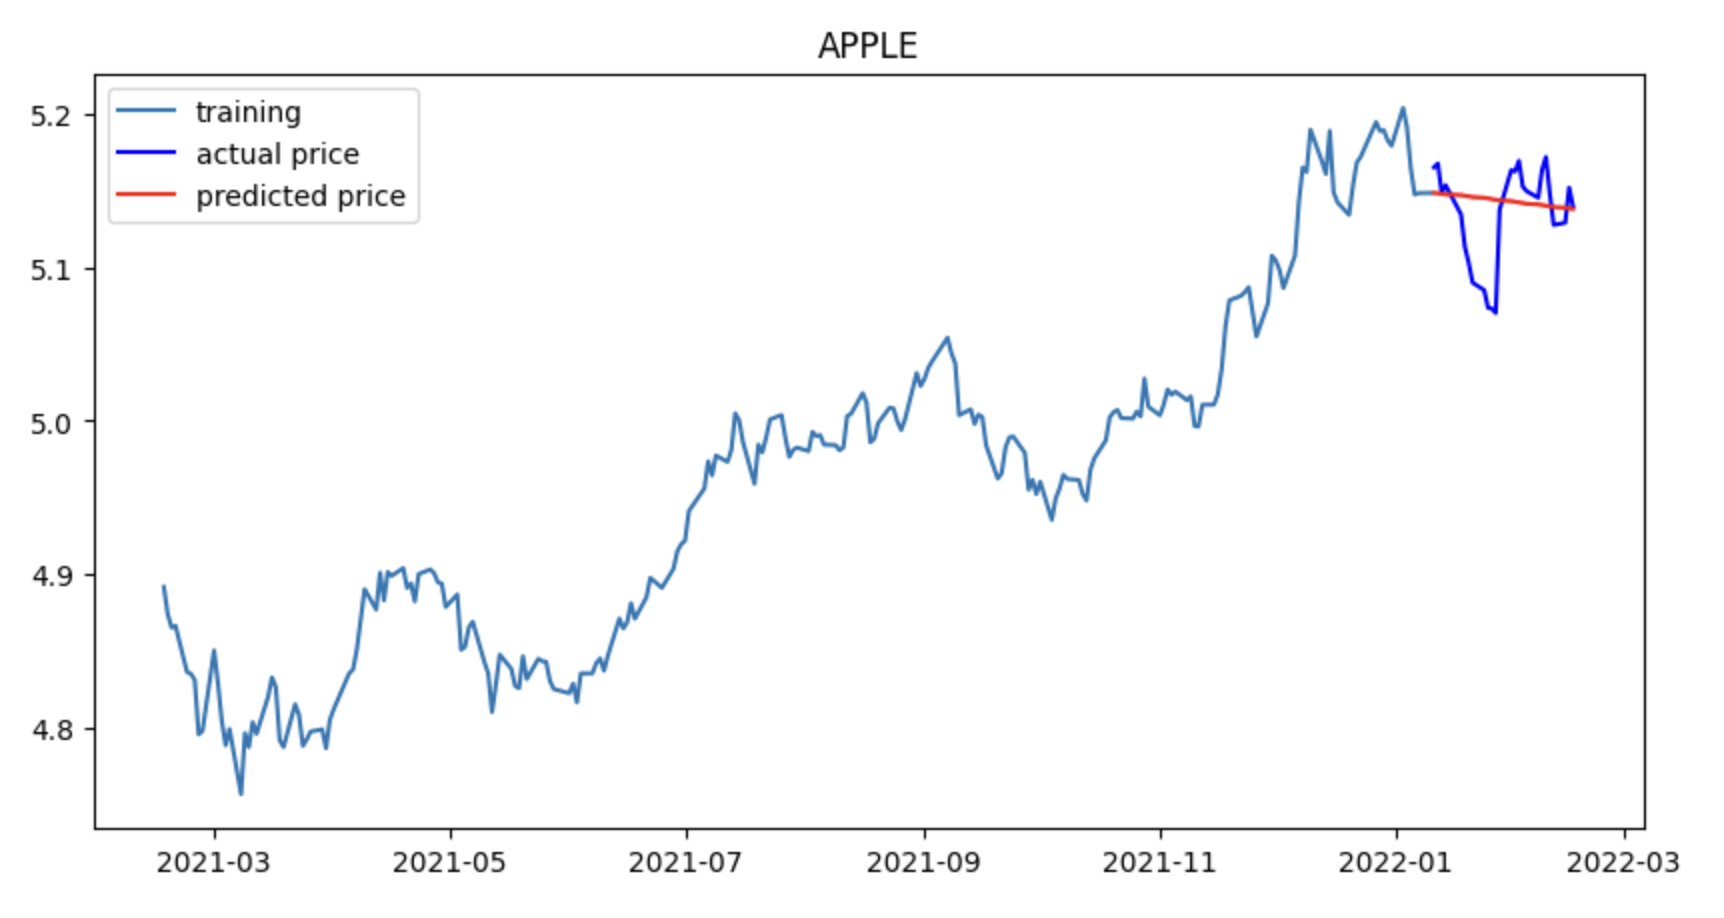

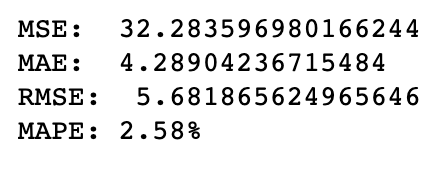

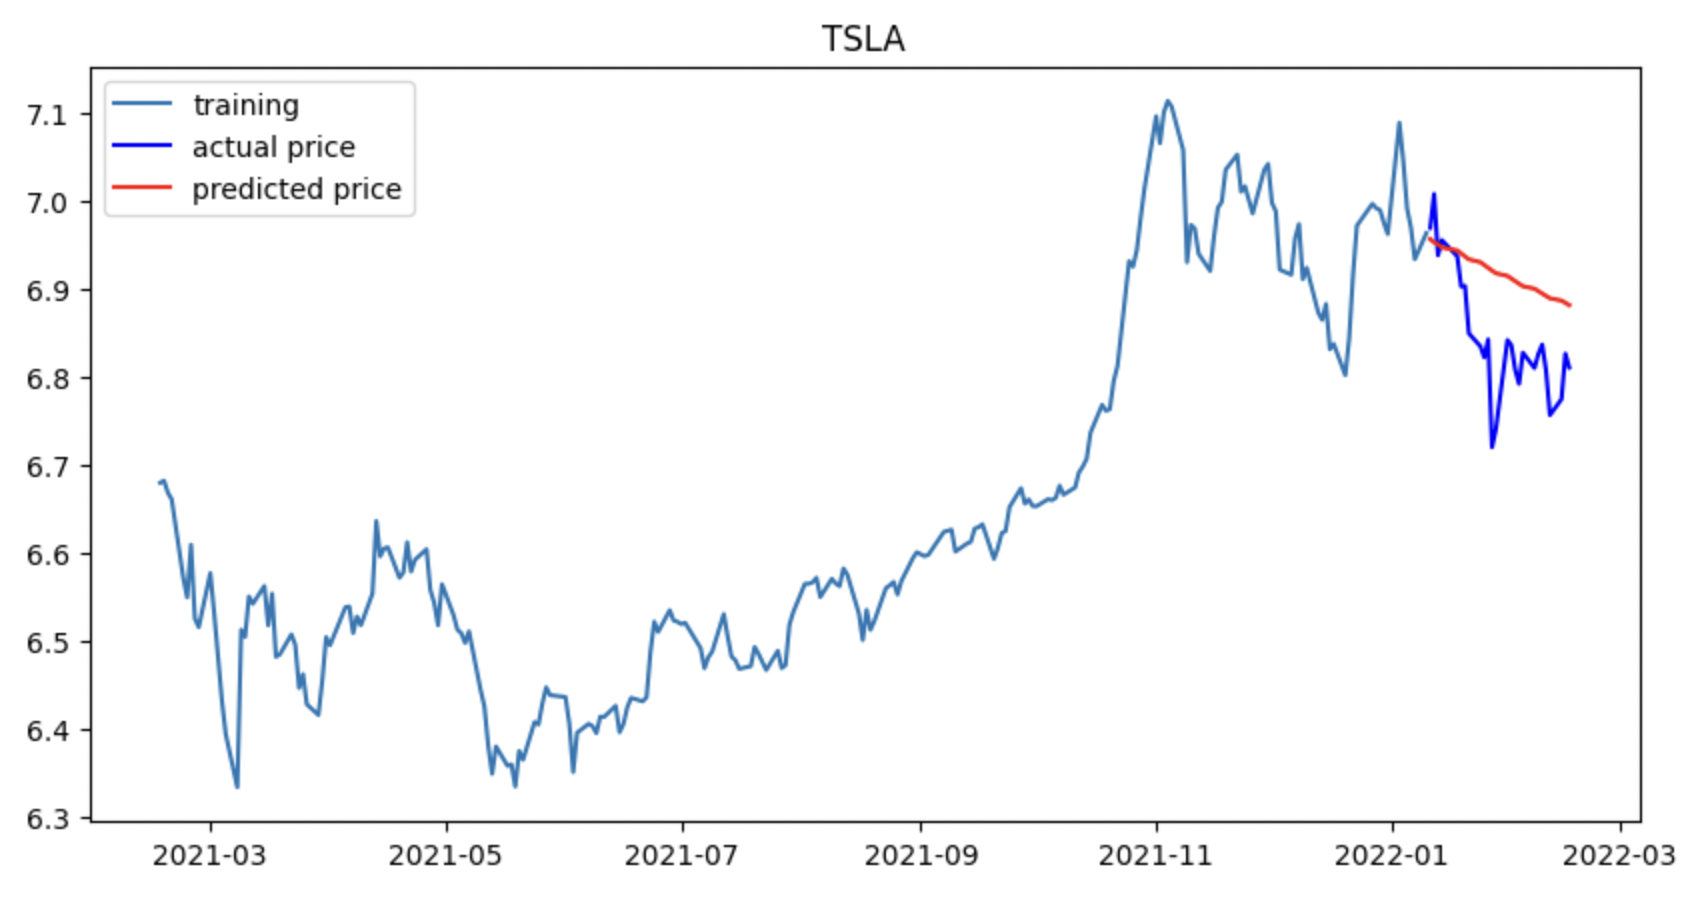

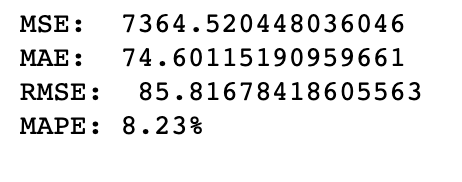

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산 
mse = mean_squared_error(np.exp(test_data), np.exp(fc)) # MSE
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc)) # MAE
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc))) # RMSE
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data))) # MAPE
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  13478541.78349035
MAE:  3204.138984444211
RMSE:  3671.3133594791866
MAPE: 4.33%


# 회고

이번 노드는 주식에 관심이 없는 나에게는 엄청난 난관이었다,,,

LMS 노드를 읽으면서도 무슨 말인지 하나도 알아듣지 못한건 처음인 것 같다 ㅜㅜㅜ

그럼에도 생각보다 결과들이 잘 나와줘서 기분은 좋았다 ㅎㅅㅎ 

익스플로레이션을 하면서 코드를 한줄씩 다 분석하는 걸 저번 노드부터 시작했는데 분석을 다 끝낸건 처음이었다.

시간은 오래걸렸지만 이전에는 그냥 모르고 넘어갔던 부분들도 알아가서 더 의미 있는 시간이 되었다.
